# Customer Churn Analysis

# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Importing Necessary Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder,power_transform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet


In [3]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.head()        #To get first 5 records from data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA(Exloratory Data Analyisis)


In [4]:
df.describe(include="all")    #Describing the data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# EDA(Exploratory Data Analysis)


In [5]:
df.info()       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape


(7043, 21)

In [7]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Finding Null Values


In [8]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

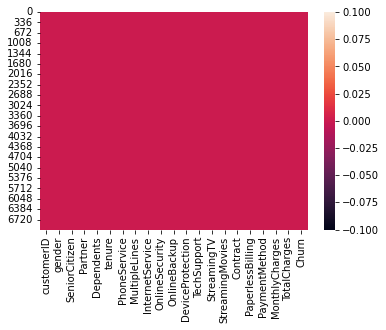

In [9]:
sns.heatmap(df.isnull())


There is no null values present inthe data


In [10]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are so much data have a object type


In [11]:
df.duplicated().sum()


0

In [12]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+str(df[column].unique()))
        print(str(column)+':'+str(df[column].nunique()))
        print(df[column].value_counts())
        print("-------------------------------------------")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
customerID:7043
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
-------------------------------------------
gender:['Female' 'Male']
gender:2
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------------
Partner:['Yes' 'No']
Partner:2
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------------------
Dependents:['No' 'Yes']
Dependents:2
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------------------
PhoneService:['No' 'Yes']
PhoneService:2
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------------------
MultipleLines:['No phone service' 'No' 'Yes']
MultipleLines:3
No                  3

# Removing dummy column


In [13]:
df1=df.drop('customerID',axis=1)


In [14]:
df1.shape


(7043, 20)

# Data Visualization


No     5174
Yes    1869
Name: Churn, dtype: int64

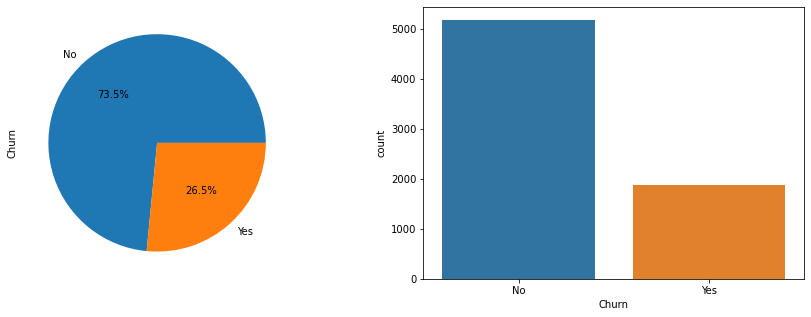

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['Churn'])
df['Churn'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

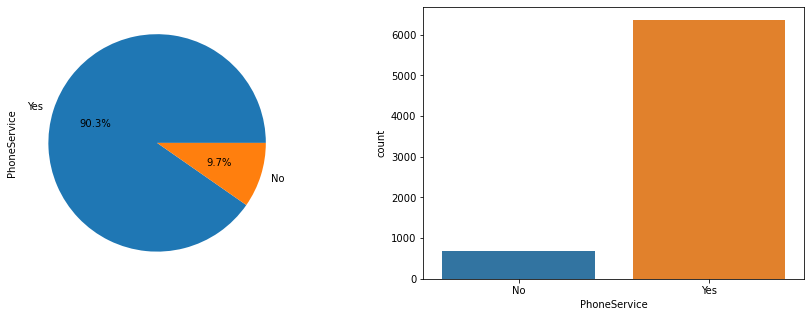

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['PhoneService'])
df['PhoneService'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

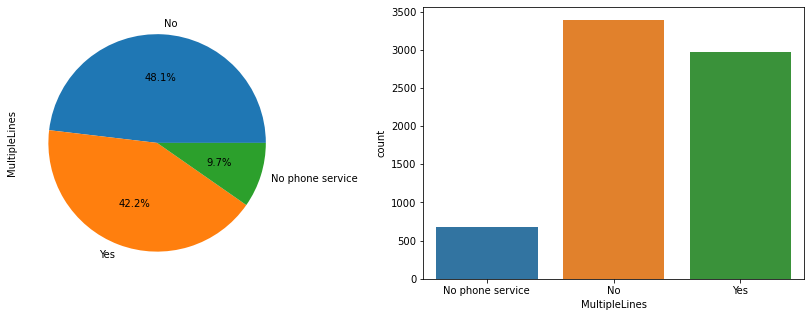

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['MultipleLines'])
df['MultipleLines'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

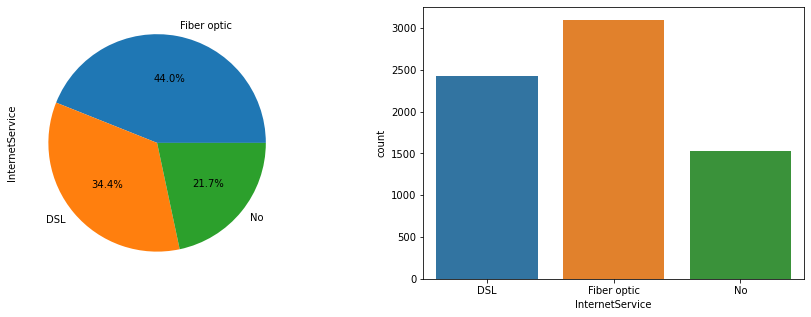

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['InternetService'])
df['InternetService'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

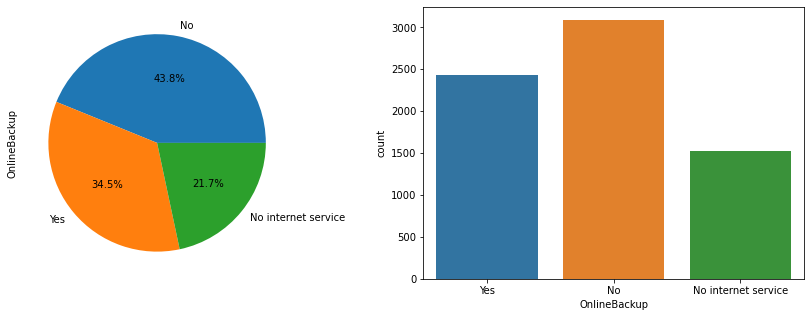

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['OnlineBackup'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['OnlineBackup'])
df['OnlineBackup'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

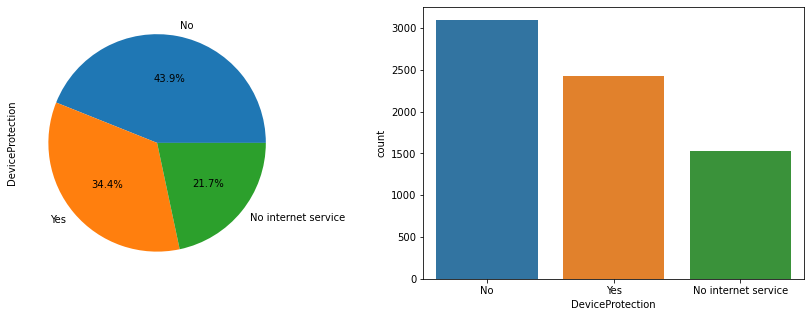

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['DeviceProtection'])
df['DeviceProtection'].value_counts()

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

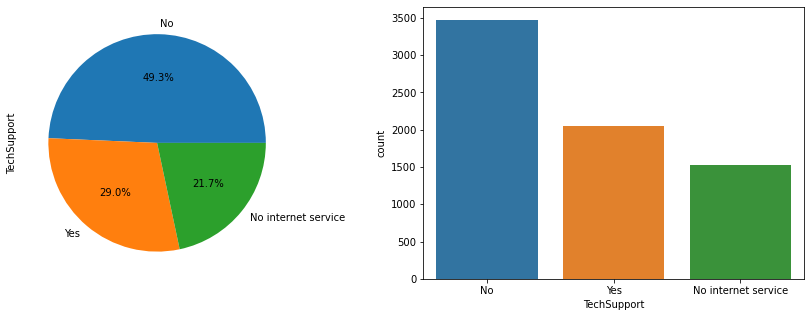

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

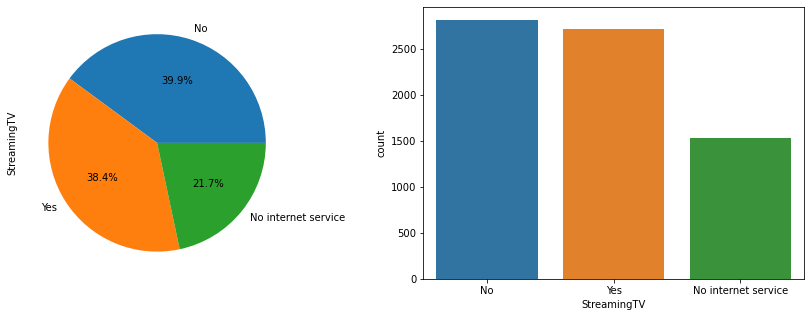

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['StreamingTV'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['StreamingTV'])

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

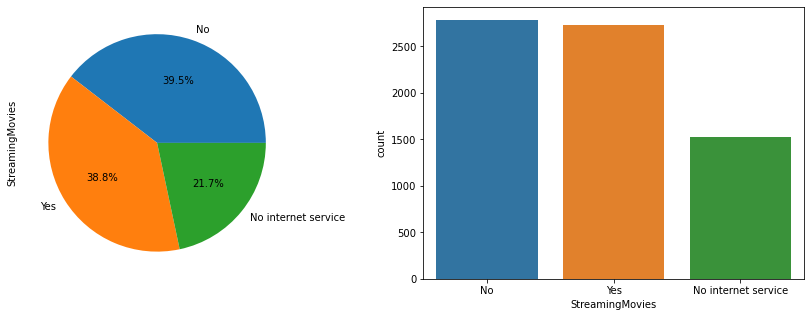

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['StreamingMovies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['StreamingMovies'])
df['StreamingMovies'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

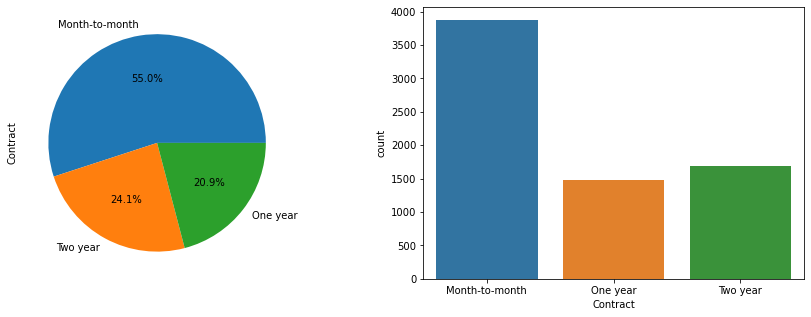

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['Contract'])
df['Contract'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

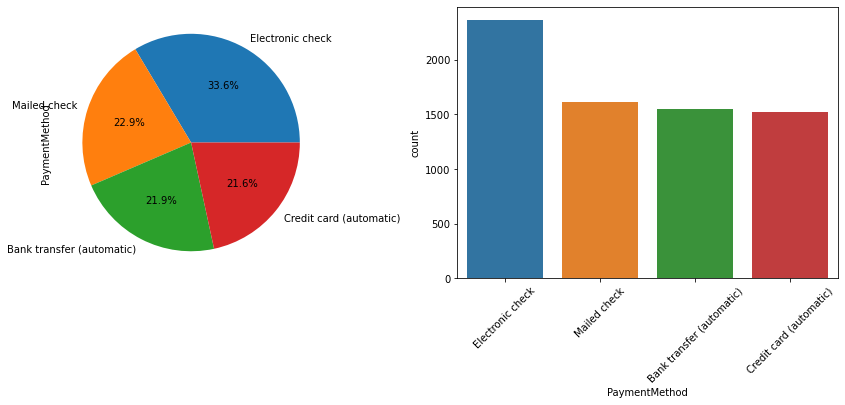

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df1['PaymentMethod'])
plt.xticks(Rotation=45)
df['PaymentMethod'].value_counts()

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

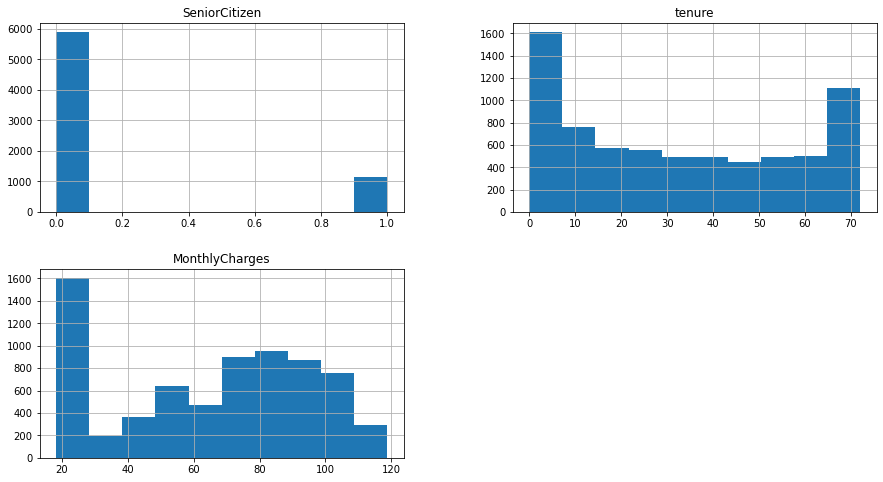

In [26]:
df1.hist(figsize=(15,8))

# Encoding Data

In [27]:
LE=LabelEncoder()
for column in df1.columns:
    if df1[column].dtype==object:
        df1[column]=LE.fit_transform(df1[column])
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [28]:
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

# Correlation

In [30]:
df1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


# Correlation Matrix


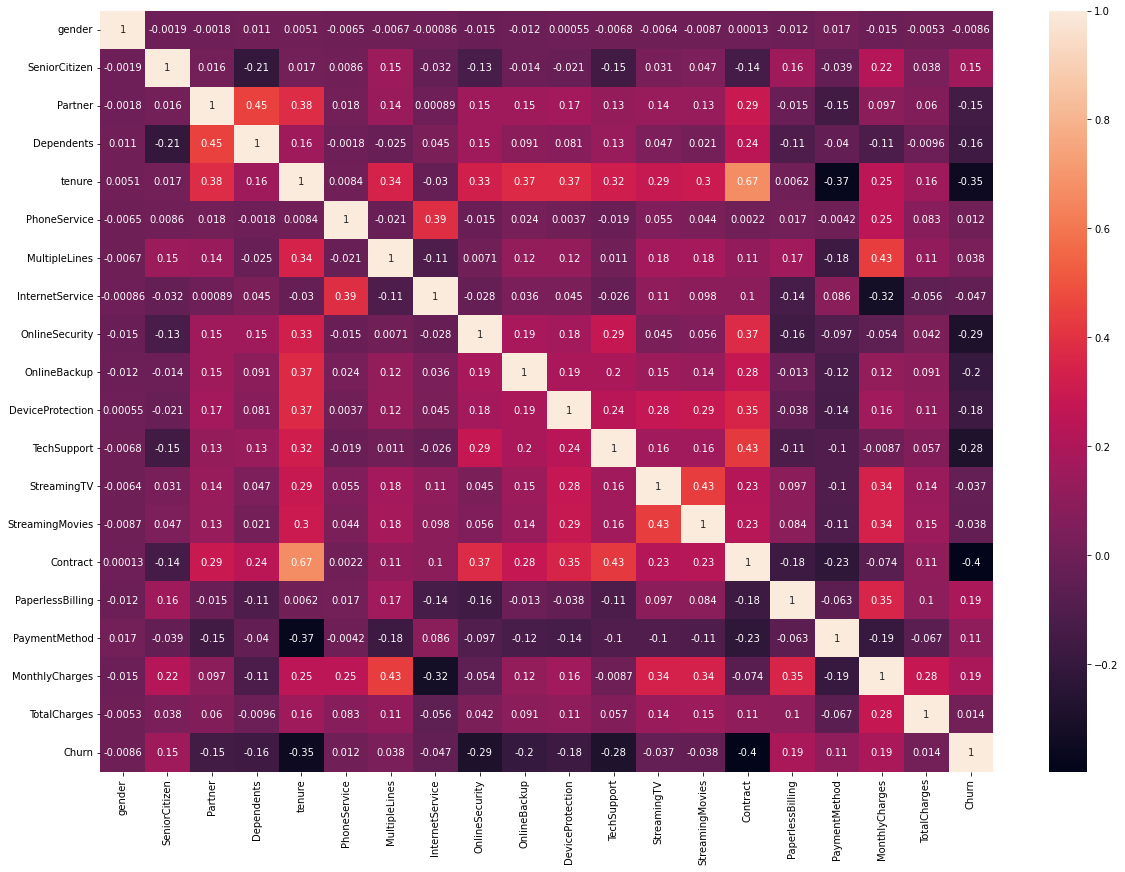

In [31]:
plt.figure(figsize=(20,14))
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Distribution plot

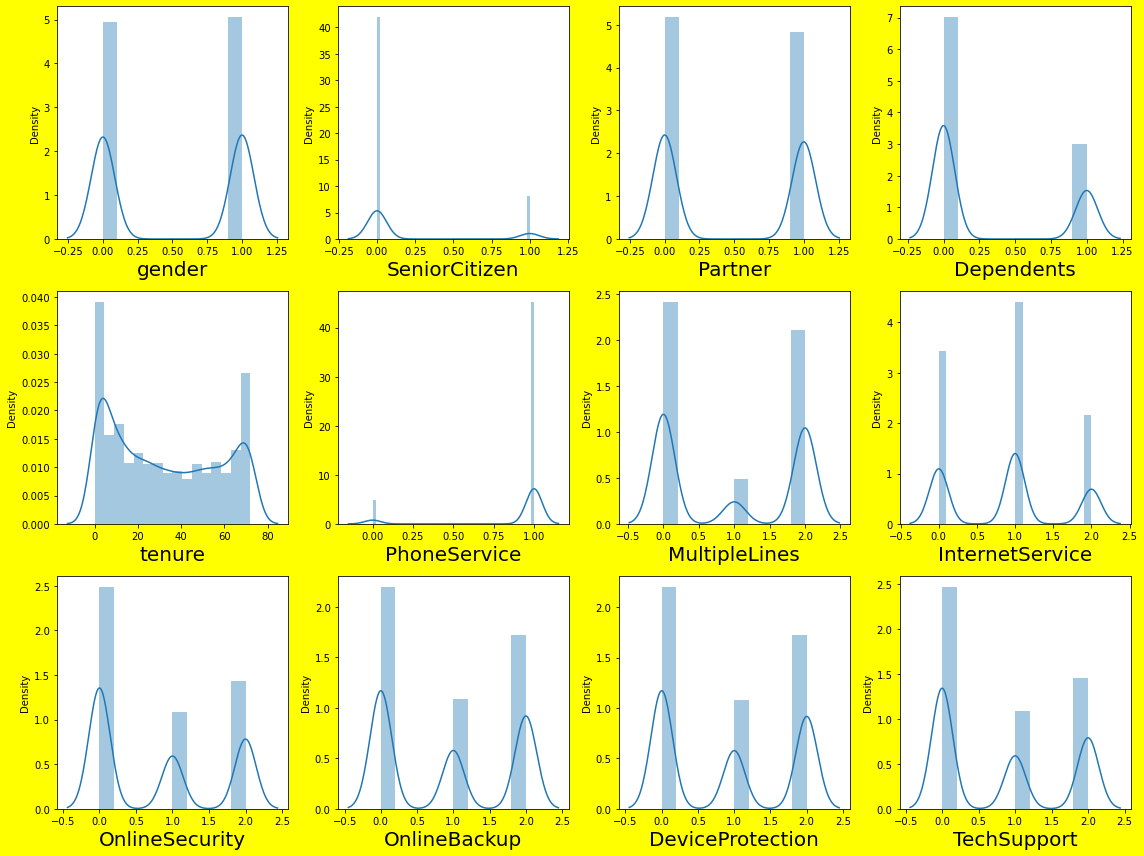

In [32]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df1:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()

# Finding skewness in the data


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

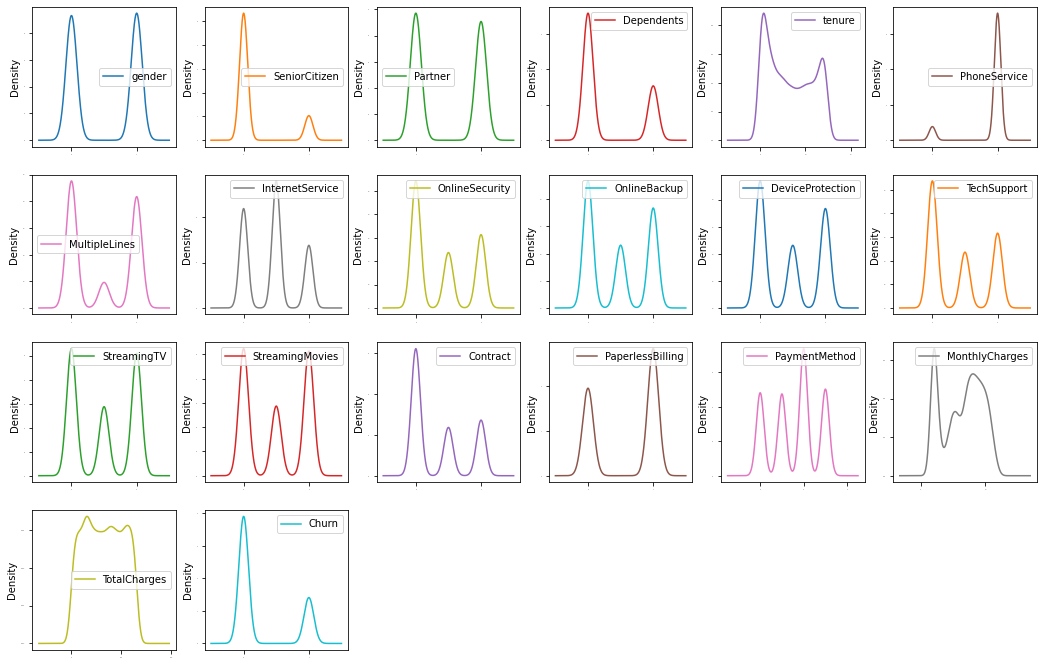

In [33]:
df1.plot(kind='density',subplots=True,layout=(6,6),sharex=False,figsize=(18,18),fontsize=1,legend=True)


# Multicollinearity


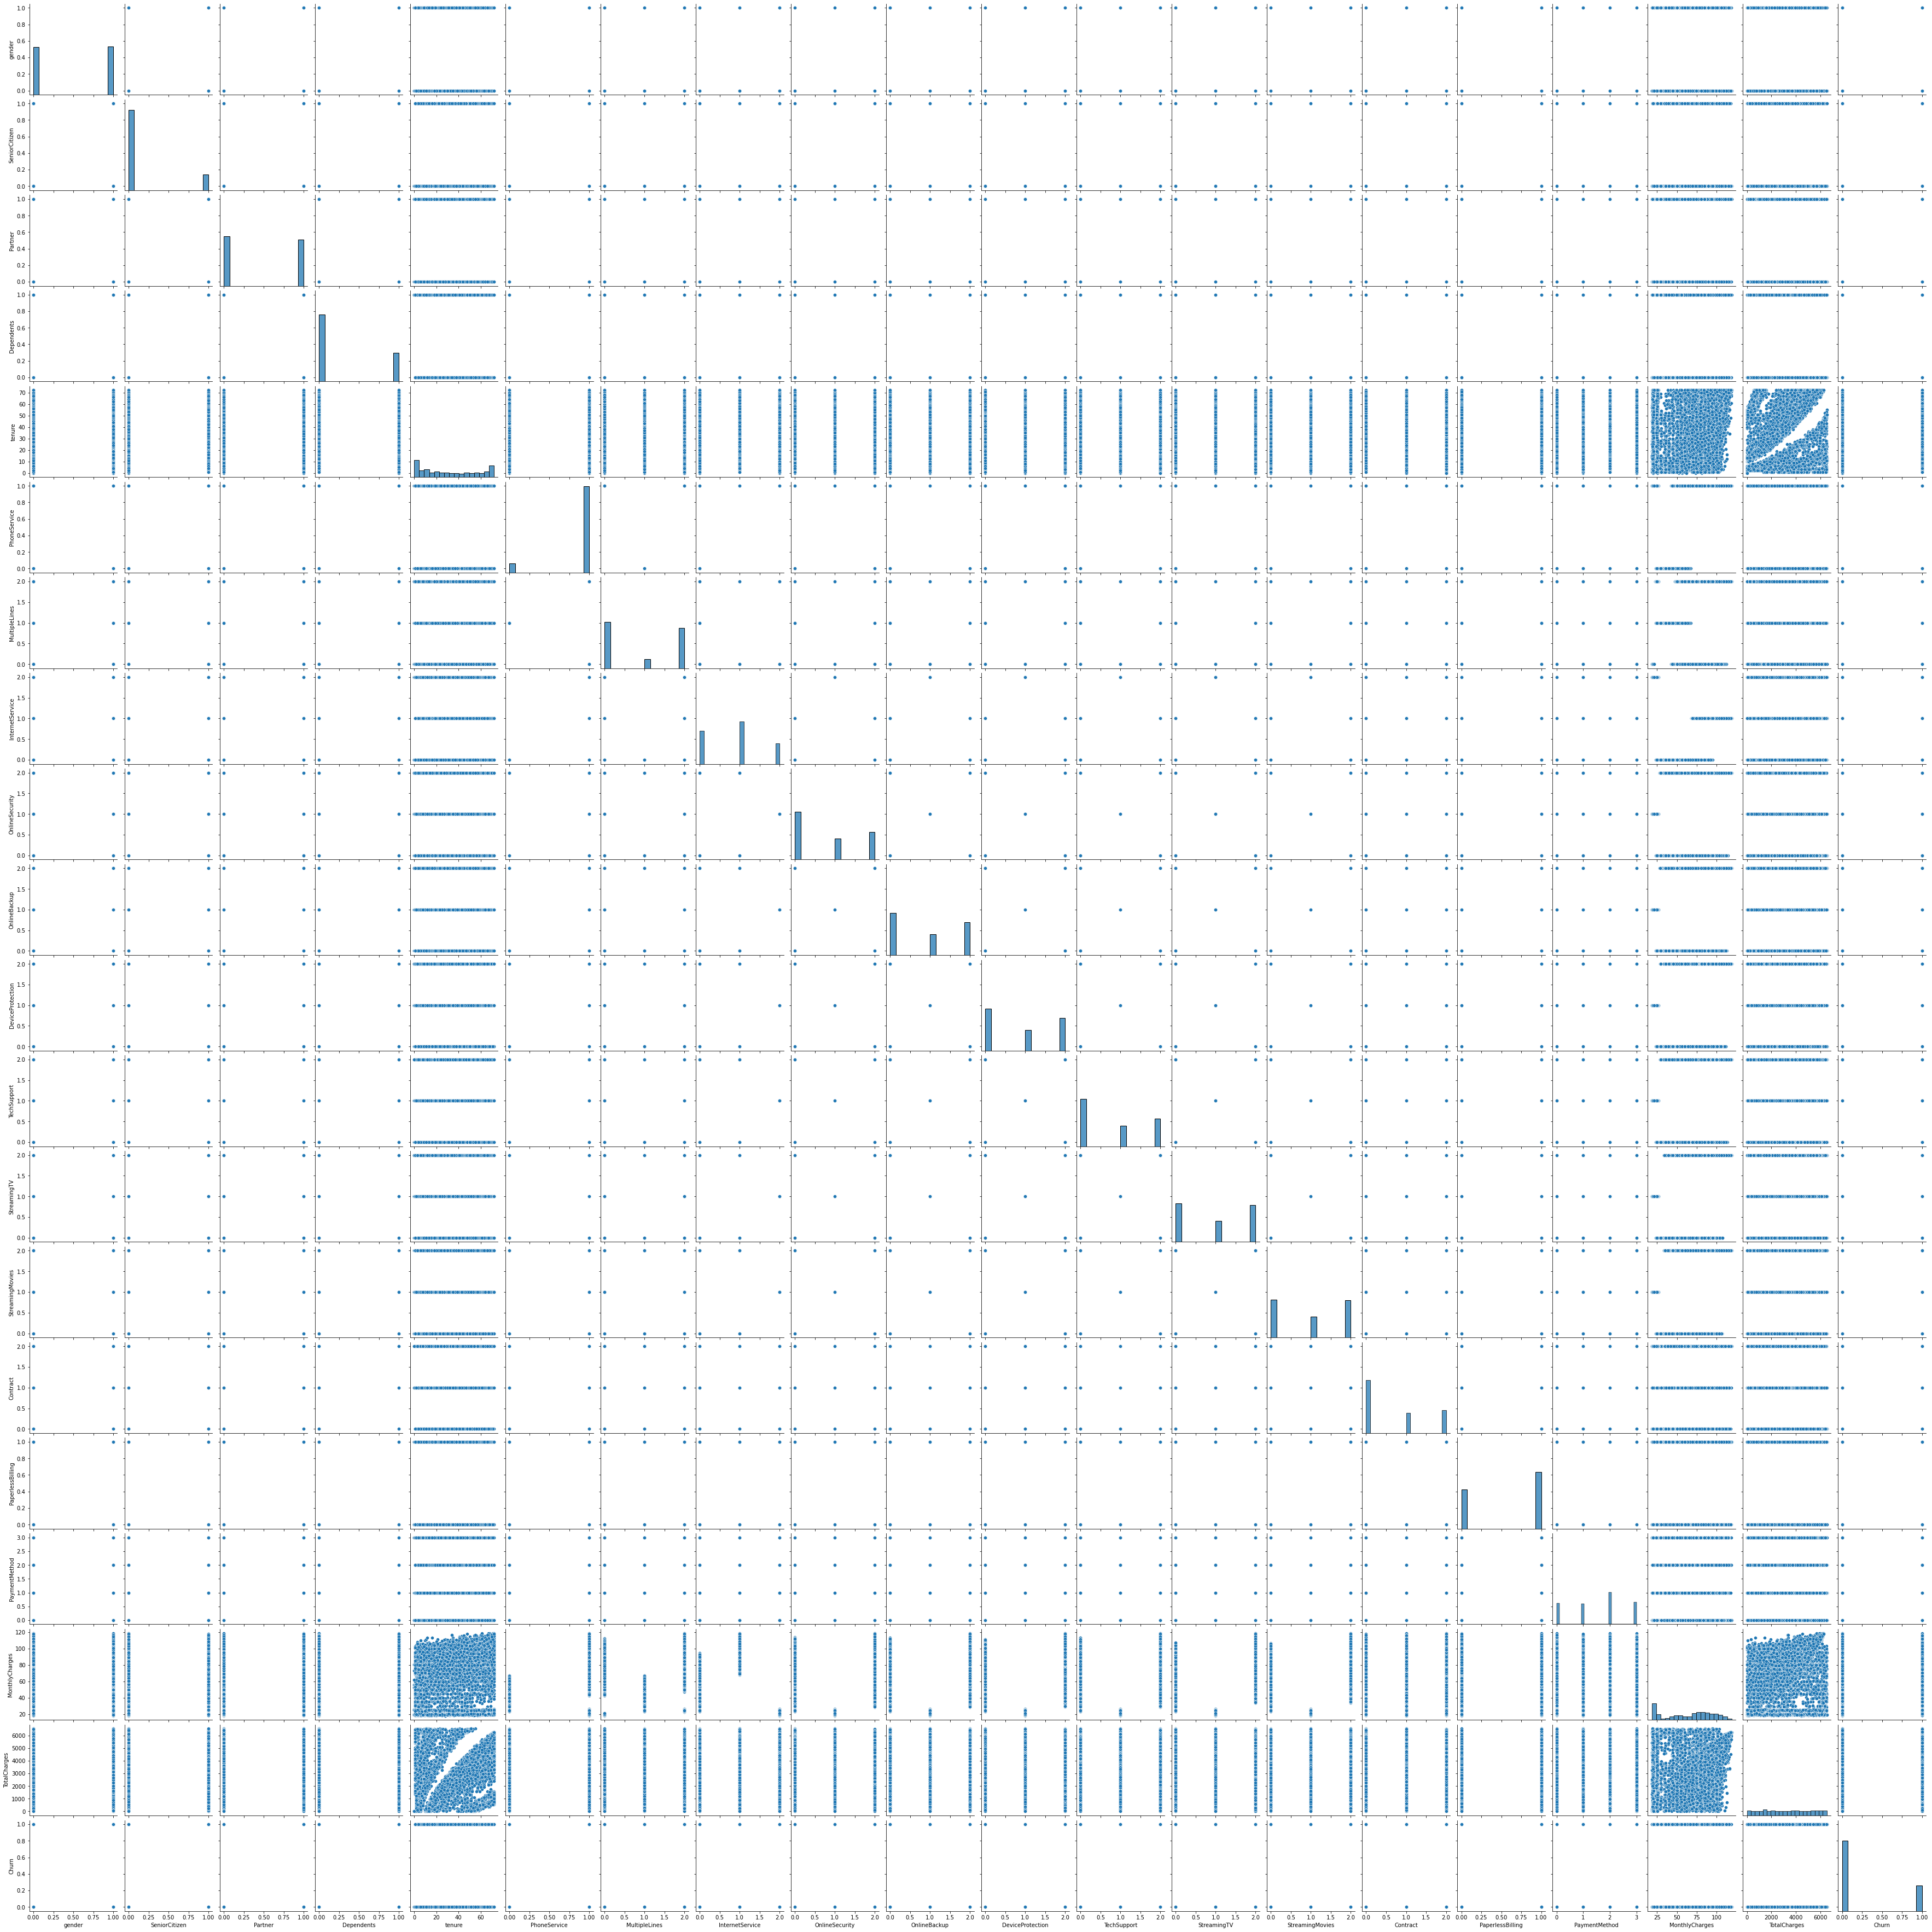

In [34]:
sns.pairplot(df1)


# Finding Outliers using BoxPlot


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'gender'),
  Text(2, 0, 'SeniorCitizen'),
  Text(3, 0, 'Partner'),
  Text(4, 0, 'Dependents'),
  Text(5, 0, 'tenure'),
  Text(6, 0, 'PhoneService'),
  Text(7, 0, 'MultipleLines'),
  Text(8, 0, 'InternetService'),
  Text(9, 0, 'OnlineSecurity'),
  Text(10, 0, 'OnlineBackup'),
  Text(11, 0, 'DeviceProtection'),
  Text(12, 0, 'TechSupport'),
  Text(13, 0, 'StreamingTV'),
  Text(14, 0, 'StreamingMovies'),
  Text(15, 0, 'Contract'),
  Text(16, 0, 'PaperlessBilling'),
  Text(17, 0, 'PaymentMethod'),
  Text(18, 0, 'MonthlyCharges'),
  Text(19, 0, 'TotalCharges'),
  Text(20, 0, 'Churn')])

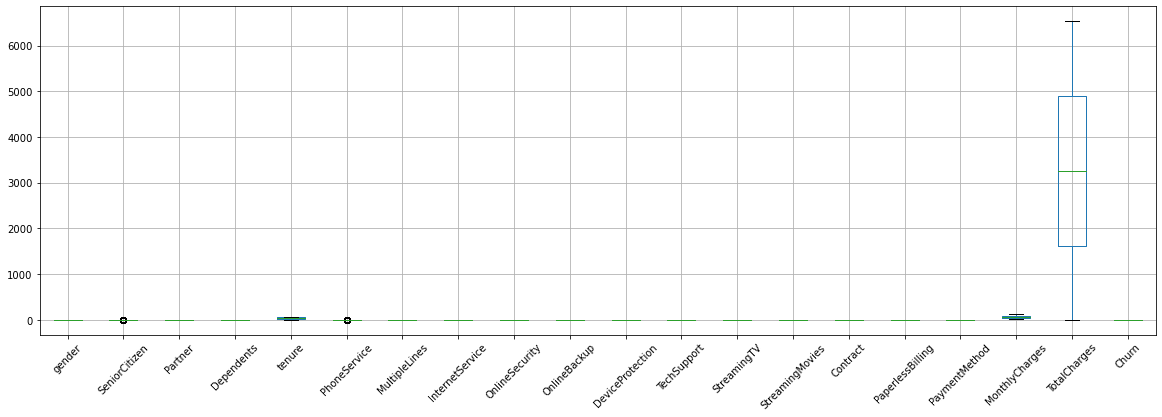

In [35]:
df1.boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.5)
plt.xticks(Rotation=45)

In [36]:
(np.abs(zscore(df1)<3)).all()


gender              True
SeniorCitizen       True
Partner             True
Dependents          True
tenure              True
PhoneService        True
MultipleLines       True
InternetService     True
OnlineSecurity      True
OnlineBackup        True
DeviceProtection    True
TechSupport         True
StreamingTV         True
StreamingMovies     True
Contract            True
PaperlessBilling    True
PaymentMethod       True
MonthlyCharges      True
TotalCharges        True
Churn               True
dtype: bool

In [37]:
df1.skew()


gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

# Splitting features and labels


In [38]:
x=df1.drop('Churn',axis=1)
y=df1['Churn']
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


# ScatterPlot Realtion


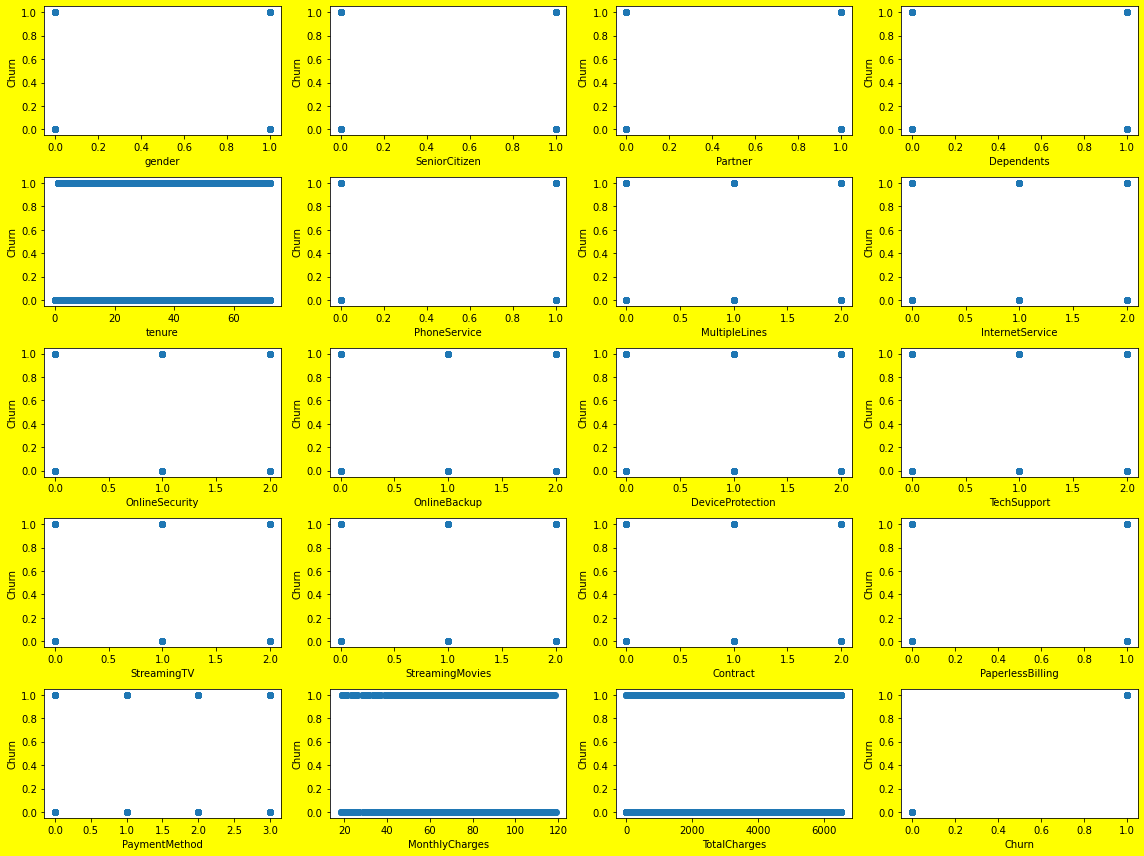

In [39]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        plt.scatter(df1[column],df1['Churn'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Churn',fontsize=10)
        
        plotnumber+=1
    plt.tight_layout()

In [40]:
x.skew()


gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
dtype: float64

# Removing skewness


In [42]:
x_new=np.sqrt(x[x.columns])
x_new.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.235999
PhoneService       -2.727153
MultipleLines       0.000972
InternetService    -0.398235
OnlineSecurity      0.135337
OnlineBackup       -0.092544
DeviceProtection   -0.088638
TechSupport         0.121424
StreamingTV        -0.249239
StreamingMovies    -0.263530
Contract            0.344639
PaperlessBilling   -0.375396
PaymentMethod      -0.852235
MonthlyCharges     -0.484557
TotalCharges       -0.557401
dtype: float64

# Pre-Processing Model


In [43]:
x_new=power_transform(x_new)
x_new

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.44838224,
        -1.1574742 , -0.28499315],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.22765832,
        -0.24433498, -0.88556143],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.22765832,
        -0.34722785, -1.93133988],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.44838224,
        -1.16609316, -0.02962705],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.22765832,
         0.33008074, -0.20255516],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.59273045,
         1.34470955,  1.08622936]])

# Scaling Data


In [44]:
std=StandardScaler()
x_scaled=std.fit_transform(x_new)
scaled=pd.DataFrame(x_scaled,columns=x.columns)
scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.648642,-3.054010,0.582058,-1.305796,-0.995162,1.079189,-1.106328,-1.001794,-1.191202,-1.198930,-0.898767,0.829798,0.448382,-1.157474,-0.284993
1,0.990532,-0.439916,-0.966622,-0.654012,0.286299,0.327438,-1.029421,-1.305796,1.166933,-1.108345,1.080617,-1.001794,-1.191202,-1.198930,0.924533,-1.205113,1.227658,-0.244335,-0.885561
2,0.990532,-0.439916,-0.966622,-0.654012,-1.483408,0.327438,-1.029421,-1.305796,1.166933,1.079189,-1.106328,-1.001794,-1.191202,-1.198930,-0.898767,0.829798,1.227658,-0.347228,-1.931340
3,0.990532,-0.439916,-0.966622,-0.654012,0.638898,-3.054010,0.582058,-1.305796,1.166933,-1.108345,1.080617,1.161320,-1.191202,-1.198930,0.924533,-1.205113,-1.592730,-0.733610,-0.927442
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.483408,0.327438,-1.029421,0.400664,-0.995162,-1.108345,-1.106328,-1.001794,-1.191202,-1.198930,-0.898767,0.829798,0.448382,0.208873,-1.249317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.087977,0.327438,1.040987,-1.305796,1.166933,-1.108345,1.080617,1.161320,1.024093,1.019282,0.924533,0.829798,1.227658,0.669393,-0.804071
7039,-1.009559,-0.439916,1.034530,1.529024,1.353921,0.327438,1.040987,0.400664,-0.995162,1.079189,1.080617,-1.001794,1.024093,1.019282,0.924533,0.829798,-0.381231,1.265644,1.209381
7040,-1.009559,-0.439916,1.034530,1.529024,-0.722546,-3.054010,0.582058,-1.305796,1.166933,-1.108345,-1.106328,-1.001794,-1.191202,-1.198930,-0.898767,0.829798,0.448382,-1.166093,-0.029627
7041,0.990532,2.273159,1.034530,-0.654012,-1.249431,0.327438,1.040987,0.400664,-0.995162,-1.108345,-1.106328,-1.001794,-1.191202,-1.198930,-0.898767,0.829798,1.227658,0.330081,-0.202555


# Applying PCA


In [45]:
from sklearn.decomposition import PCA
 
pca=PCA(n_components=19).fit_transform(scaled) # Fit the data to PCA
x_pca=pd.DataFrame(pca,columns=x.columns)
x_pca

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-2.604988,-0.373118,2.725729,0.603695,0.854898,1.085392,-0.968893,0.897381,-1.696135,0.182559,-1.655827,-0.218705,-0.194536,-0.063874,-0.183866,-0.316080,-1.467026,0.601982,0.628284
1,-0.826795,-1.779782,0.818650,0.676403,-0.569068,-1.020954,0.872736,0.129760,0.948953,-0.420079,1.944227,-1.467237,0.565583,1.625298,0.277094,-0.591886,0.487709,0.016000,0.081679
2,-2.629748,-1.714000,0.308872,0.175471,-0.334252,-0.187000,1.091393,-0.105610,-2.268250,0.119585,0.933847,0.095798,0.790812,1.771583,0.048660,0.714287,-0.101950,0.599640,0.241420
3,0.405658,-1.396219,3.468530,2.769191,-0.315542,-0.449280,1.080916,-0.981181,1.172273,0.226167,0.278441,-0.625681,-0.946471,-0.315260,0.205622,0.393539,0.020582,-0.785814,0.755443
4,-3.451454,-0.578341,-0.606204,-0.473837,-0.622919,0.814187,-0.558853,-1.054406,-0.453113,0.132639,0.492023,-0.323377,0.055239,-0.027511,-0.062726,-0.514840,0.084261,-0.170279,0.717513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.835733,0.257435,0.685318,-0.631973,2.254127,-0.798461,-0.273393,-0.432999,-0.050413,0.352972,2.507242,-0.025770,-0.008594,0.176438,0.076479,1.049608,0.278200,0.947581,0.108260
7039,2.357966,2.437823,-0.127889,-1.348955,0.497978,0.249462,-1.287316,0.075148,-0.491663,-0.620811,-1.017509,-0.999077,0.101719,0.234195,-0.054521,-0.643999,0.714311,0.041743,-0.070603
7040,-1.798073,-0.841764,3.607877,-0.656320,1.165274,0.776638,-1.381170,0.698909,-0.487364,0.700680,-0.106685,0.484143,-1.898045,0.834848,0.075833,0.175041,-0.162185,-0.371143,0.159586
7041,-2.965840,1.371466,-0.102670,-1.020679,0.628018,0.637482,1.707179,1.615889,0.095906,0.117390,0.993270,0.057036,-0.642912,-0.788986,-0.045610,-0.233646,-0.553250,0.619944,0.404382


<AxesSubplot:>

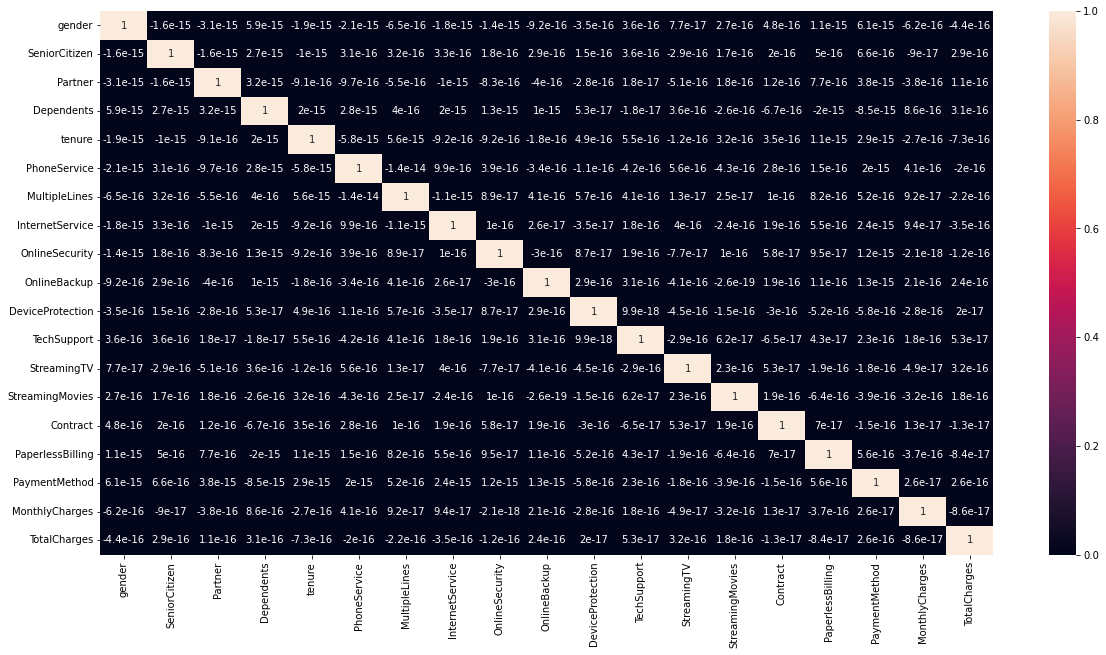

In [46]:
plt.figure(figsize=[20,10])
sns.heatmap(x_pca.corr(),annot=True)

# Finding Best Random state


In [47]:
bestrandom=0
max_score=0
#models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for i in range(0,500):
    LR=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.20,random_state=i)
    model=LR.fit(x_train,y_train)
    predrf=model.predict(x_test)
    acc=accuracy_score(y_test,predrf)*100
    print('Accuracy score',acc,'Random State',i)
    
    if acc>max_score:
        max_score=acc
        bestrandom=i
        print('Accuracy score',max_score,'Random State',i)

    
#print('Best Accuracy score',max_score,'Best Random State',i)

Accuracy score 79.20511000709723 Random State 0
Accuracy score 79.20511000709723 Random State 0
Accuracy score 81.40525195173882 Random State 1
Accuracy score 81.40525195173882 Random State 1
Accuracy score 81.68914123491838 Random State 2
Accuracy score 81.68914123491838 Random State 2
Accuracy score 81.5471965933286 Random State 3
Accuracy score 78.49538679914833 Random State 4
Accuracy score 80.1277501774308 Random State 5
Accuracy score 80.62455642299503 Random State 6
Accuracy score 80.97941802696948 Random State 7
Accuracy score 78.99219304471256 Random State 8
Accuracy score 80.19872249822569 Random State 9
Accuracy score 81.40525195173882 Random State 10
Accuracy score 80.48261178140525 Random State 11
Accuracy score 80.1277501774308 Random State 12
Accuracy score 81.26330731014905 Random State 13
Accuracy score 82.46983676366217 Random State 14
Accuracy score 82.46983676366217 Random State 14
Accuracy score 80.76650106458482 Random State 15
Accuracy score 80.55358410220013 Ran

In [48]:
print('Best Accuracy score',max_score,'Best Random State',bestrandom)


Best Accuracy score 83.0376153300213 Best Random State 282


# Train_test_split Method


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=20,random_state=283)


# Building Model`


In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),SVC()]
for model in models:
    model.fit(x_train,y_train)
    predlr=model.predict(x_test)
    print("Model Name",model)
    print("Accuracy",accuracy_score(y_test,predlr)*100)
    print(confusion_matrix(y_test,predlr))
    print(classification_report(y_test,predlr))
    print('----------------------------------------------------------')
    scr=cross_val_score(model,x_pca,y,cv=5)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('==========================================================')

Model Name LogisticRegression()
Accuracy 90.0
[[14  1]
 [ 1  4]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.87      0.87      0.87        20
weighted avg       0.90      0.90      0.90        20

----------------------------------------------------------
Cross validation score is:  80.29255919736758
Mean score : 80.29255919736758
STD : 0.6092787870224712
Model Name KNeighborsClassifier()
Accuracy 85.0
[[14  1]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.84      0.85      0.84        20

-----------------------------------------------------

Hence The LogisticRegression model giving 90% Accuracy score and 80% Cross Validation Score


# HyperParameter Tuning using best GridSearchCV method


In [51]:
param={'min_samples_leaf':range(2,10),'min_samples_split':range(3,10),'max_depth':range(1,5),
                                    "max_features" :["auto", "sqrt", "log2"]}

In [52]:
rfc=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfc,
                        param_grid=param,
                        cv=5,
                        n_jobs=-1)     # Use all the cores in your system.For performance improvement.
grid_search.fit(x_train,y_train)
print(grid_search)
print("Best parameters :",grid_search.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})
Best parameters : {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 9}


In [53]:
rfc=RandomForestClassifier(max_depth=4,max_features='log2',min_samples_leaf=8,min_samples_split=5)
rfc.fit(x_train,y_train)
predlr=rfc.predict(x_test)
print("Model Name",rfc)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print("Confusion Matrix :","\n",confusion_matrix(y_test,predlr))
print("Classification Report: ","\n",classification_report(y_test,predlr))

Model Name RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=8,
                       min_samples_split=5)
Accuracy 80.0
Confusion Matrix : 
 [[14  1]
 [ 3  2]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.67      0.40      0.50         5

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20



# LogisticRegression Model


# ROC-AUC Curve


Accuracy 90.0


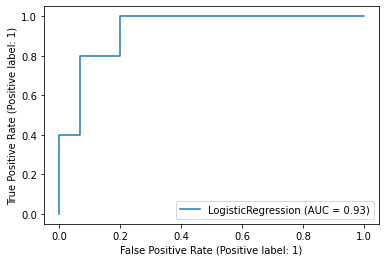

In [54]:
from sklearn.metrics import plot_roc_curve
LR=LogisticRegression(random_state=283)
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)

plot_roc_curve(LR, x_test, y_test) 
plt.show()

# Saving Model


In [55]:
filename = 'Customer Churn Analysis.pkl'
pickle.dump(LR,open(filename,'wb'))